In [ ]:
!pip install networkx

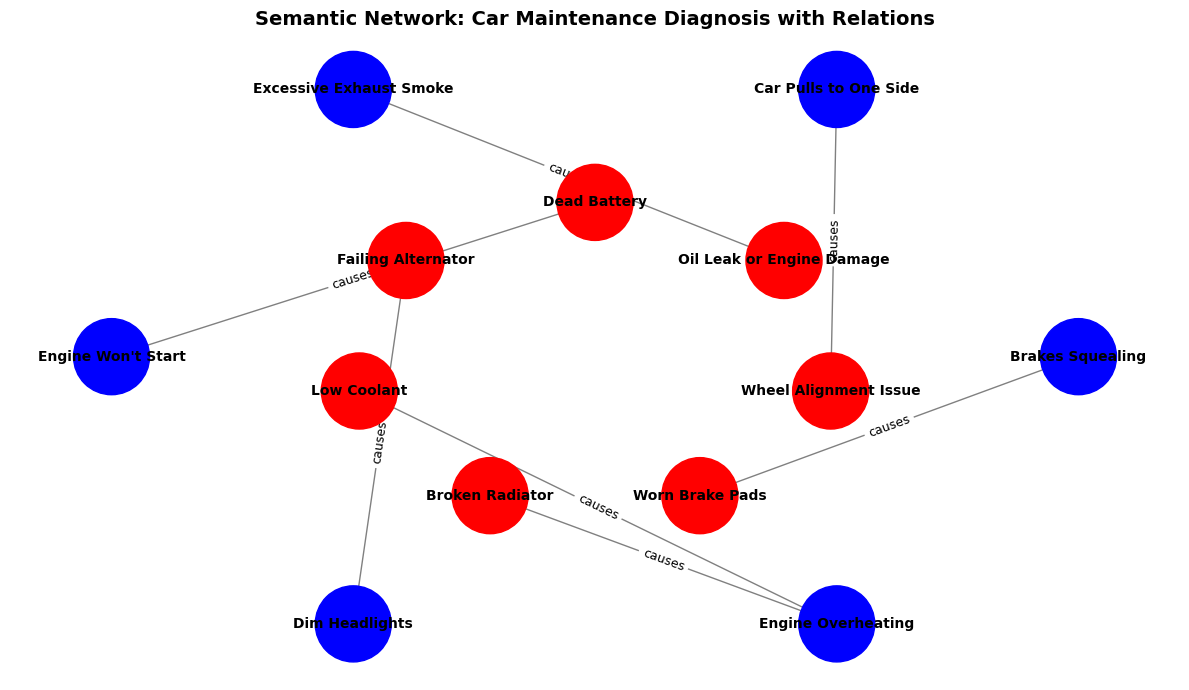

In [ ]:
# @title
import networkx as nx
import matplotlib.pyplot as plt

# Create a Directed Graph
G = nx.DiGraph()

# Add nodes (Issues and Symptoms)
issues = [
    "Dead Battery", "Failing Alternator", "Low Coolant",
    "Broken Radiator", "Worn Brake Pads", "Wheel Alignment Issue",
    "Oil Leak or Engine Damage"
]

symptoms = [
    "Engine Won't Start", "Dim Headlights", "Engine Overheating",
    "Brakes Squealing", "Car Pulls to One Side", "Excessive Exhaust Smoke"
]

# Assign colors
G.add_nodes_from(issues, color='red')
G.add_nodes_from(symptoms, color='blue')

# Add edges (Relationships)
edges = [
    ("Dead Battery", "Engine Won't Start"),
    ("Failing Alternator", "Dim Headlights"),
    ("Low Coolant", "Engine Overheating"),
    ("Broken Radiator", "Engine Overheating"),
    ("Worn Brake Pads", "Brakes Squealing"),
    ("Wheel Alignment Issue", "Car Pulls to One Side"),
    ("Oil Leak or Engine Damage", "Excessive Exhaust Smoke")
]
G.add_edges_from(edges)

# Define edge labels
edge_labels = {edge: "causes" for edge in edges}

# Use shell layout for clearer visual grouping
pos = nx.shell_layout(G, nlist=[issues, symptoms])

# Draw graph
plt.figure(figsize=(12, 7))
colors = ['red' if node in issues else 'blue' for node in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=3000)
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True, arrowsize=20)
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black', font_size=9)

plt.title("Semantic Network: Car Maintenance Diagnosis with Relations", fontsize=14, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
!pip install experta

  Preparing metadata (setup.py) ... done
  Created wheel for frozendict: filename=frozendict-1.2-py3-none-any.whl size=3149 sha256=8fe13690fcfb40d9aeca2b81607d5d6ff2af330bf2dd3b47a18998235097e03f
  Stored in directory: /root/.cache/pip/wheels/49/ac/f8/cb8120244e710bdb479c86198b03c7b08c3c2d3d2bf448fd6e
Successfully built frozendict
  Attempting uninstall: frozendict
    Found existing installation: frozendict 2.4.6
    Uninstalling frozendict-2.4.6:
      Successfully uninstalled frozendict-2.4.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yfinance 0.2.55 requires frozendict>=2.3.4, but you have frozendict 1.2 which is incompatible.


In [ ]:
!pip install --upgrade experta

In [ ]:
import collections
import collections.abc

#Fix for Python 3.10+ compatibility

if not hasattr(collections, 'Mapping'):
    collections.Mapping = collections.abc.Mapping

In [ ]:
# Car Maintenance Advisor - Expert System

from experta import *

# Define facts for car symptoms
class Symptom(Fact):
    """Car issue or behavior"""

    pass

# Define the expert system
class CarMaintenanceAdvisor(KnowledgeEngine):

    @DefFacts()
    def _initial_action(self):
        print("\n[Car Maintenance Advisor]\nPlease input the car symptoms...\n")
        yield Fact(action="diagnose")

    @Rule(Symptom(name="engine won't start"))
    def battery_issue(self):
        print("- Possible cause: Dead battery. Try jump-starting the car.")

    @Rule(Symptom(name="dim headlights"))
    def alternator_issue(self):
        print("- Possible cause: Failing alternator. Check your charging system.")

    @Rule(Symptom(name="engine overheating"))
    def overheating_issue(self):
        print("- Possible cause: Low coolant or broken radiator. Inspect cooling system.")

    @Rule(Symptom(name="brakes squealing"))
    def brake_pads_worn(self):
        print("- Possible cause: Worn brake pads. Consider replacing them.")

    @Rule(Symptom(name="car pulls to one side"))
    def alignment_issue(self):
        print("- Possible cause: Wheel alignment issue. Get an alignment check.")

    @Rule(Symptom(name="excessive exhaust smoke"))
    def smoke_issue(self):
        print("- Possible cause: Oil leak or engine damage. Inspect engine seals.")

# Instantiate and run the expert system
if __name__ == "__main__":
    engine = CarMaintenanceAdvisor()
    engine.reset()

    # Input car symptoms here
    engine.declare(Symptom(name="engine won't start"))
    engine.declare(Symptom(name="brakes squealing"))

    engine.run()



[Car Maintenance Advisor]
Please input the car symptoms...

- Possible cause: Worn brake pads. Consider replacing them.
- Possible cause: Dead battery. Try jump-starting the car.
